# Exploratory data analysis

# =============================
#  Import Libraries
# =============================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [4]:
# =============================
# 2. Load Dataset
# =============================
# Example: replace with your dataset file
df = pd.read_csv(r"C:\Users\akhil\Downloads\Book1.csv")

# First look at the data
df.head()

,S.No.,Date,Temperature (Celsius),Temperature (Kelvin),Temperature (Fahrenheit),Precipitation (mm),Wind Speed (km/h)
0,1,01-01-10,-4,269.15,24.8,8.684371,18
1,2,02-01-10,-8,265.15,17.6,8.750701,12
2,3,03-01-10,14,287.15,57.2,5.885284,1
3,4,04-01-10,10,283.15,50.0,8.767013,41
4,5,05-01-10,27,300.15,80.6,8.662592,44


# 1 Ask meaningful questions before analysis for better analysis of data

In [6]:
questions = [
    "What is the size and shape of the dataset?",
    "What types of variables exist (numeric, categorical, date)?",
    "Are there missing values or duplicates?",
    "What are the distributions of key variables (e.g., Age, Fare, Survived)?",
    "Are there correlations between variables that can indicate trends?",
    "Are there outliers or anomalies?",
    "Do certain factors (gender, class) influence survival?"
]

# 2 Explore data structure

In [5]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Data types and non-null counts
print("\nInfo about dataset:")
print(df.info())

# Statistical summary (numeric only)
print("\nSummary statistics:")
display(df.describe())

# Unique values for categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Shape of dataset: (999, 7)

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.No.                     999 non-null    int64  
 1   Date                      999 non-null    object 
 2   Temperature (Celsius)     999 non-null    int64  
 3   Temperature (Kelvin)      999 non-null    float64
 4   Temperature (Fahrenheit)  999 non-null    float64
 5   Precipitation (mm)        999 non-null    float64
 6   Wind Speed (km/h)         999 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB
None

Summary statistics:


,S.No.,Temperature (Celsius),Temperature (Kelvin),Temperature (Fahrenheit),Precipitation (mm),Wind Speed (km/h)
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.000000,10.551552,283.701552,50.992793,4.970194,24.818819
std,288.530761,11.918355,11.918355,21.453039,2.881740,14.346213
min,1.000000,-10.000000,263.150000,14.000000,0.002228,0.000000
25%,250.500000,1.000000,274.150000,33.800000,2.466849,13.000000
50%,500.000000,10.000000,283.150000,50.000000,5.015922,25.000000
75%,749.500000,21.000000,294.150000,69.800000,7.387130,37.000000
max,999.000000,30.000000,303.150000,86.000000,9.997847,50.000000



Unique values in categorical columns:
Date: 999 unique values


# 3 Identify trends,patterns and anomalies

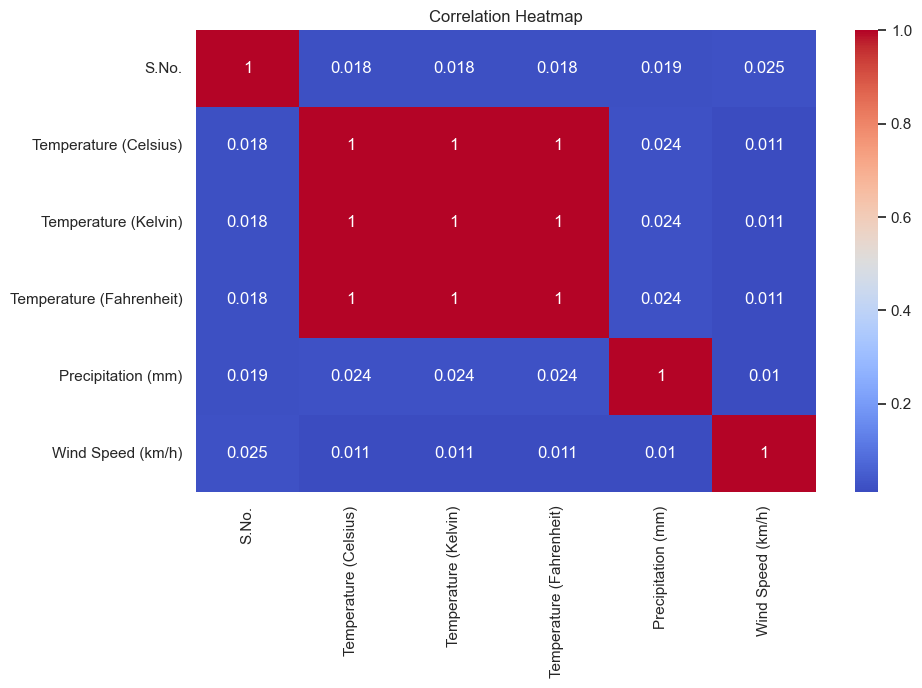

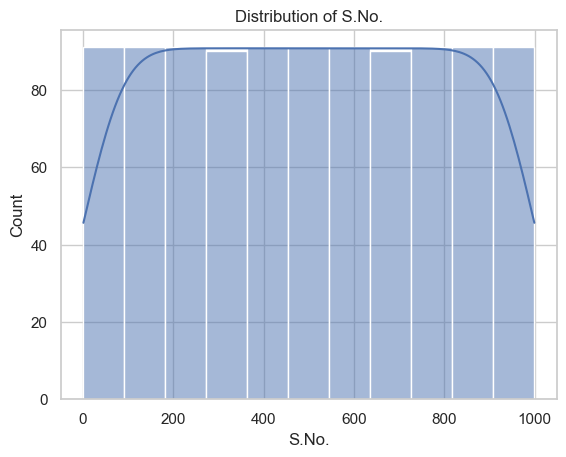

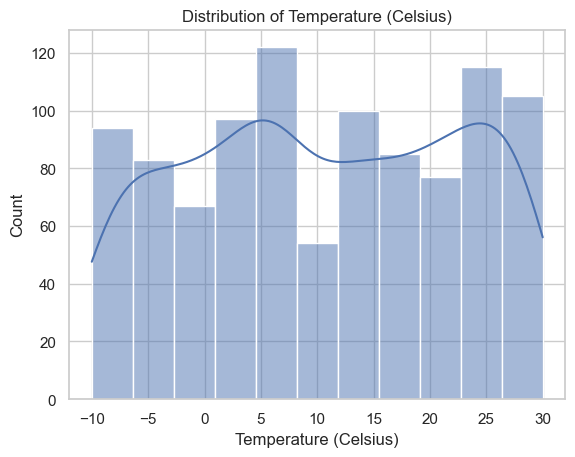

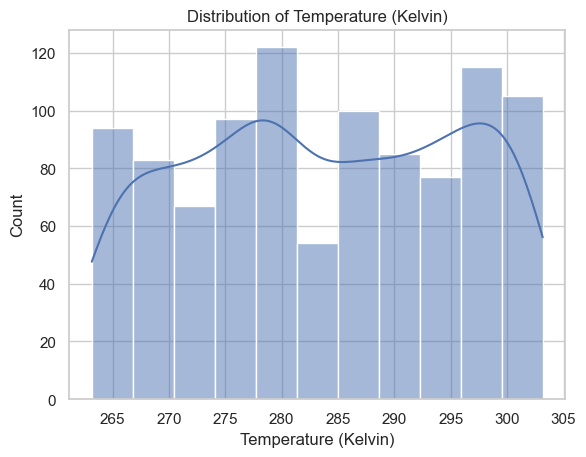

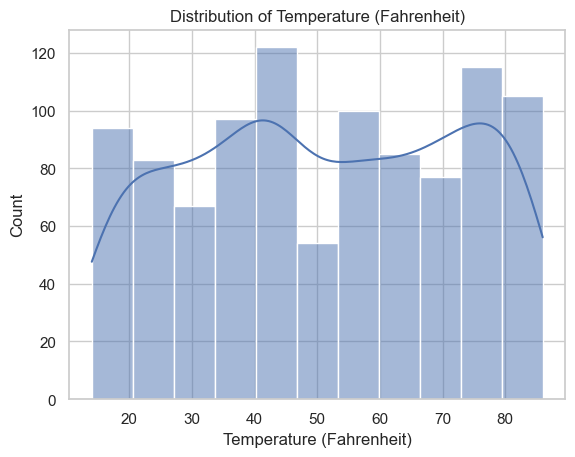

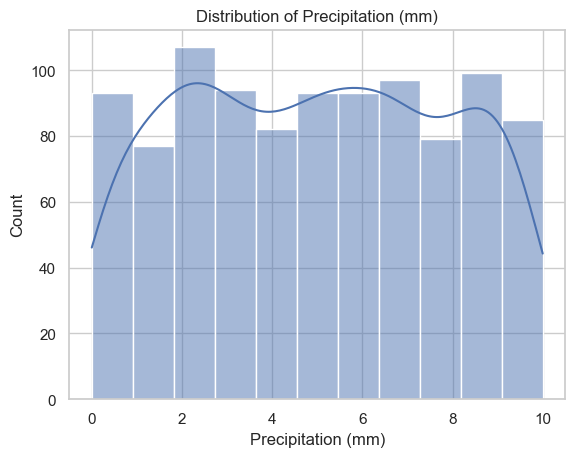

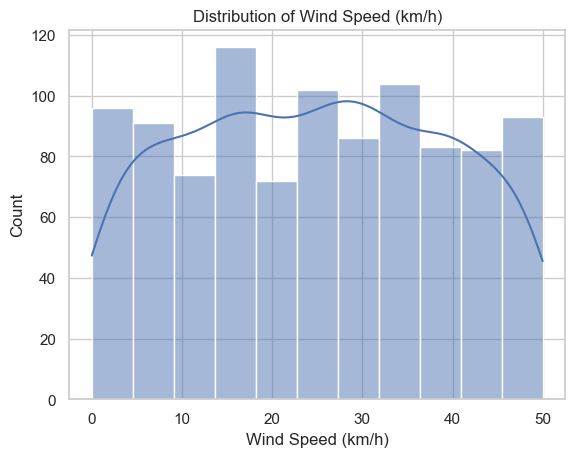

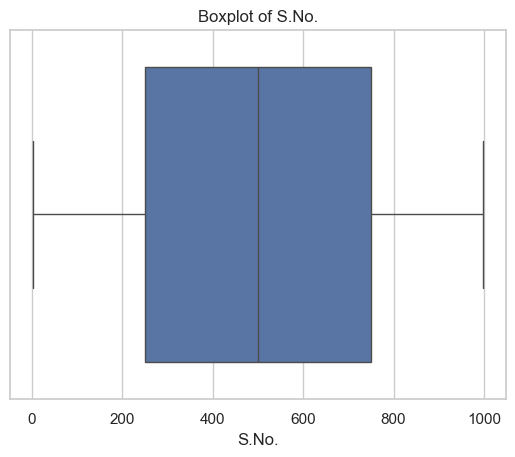

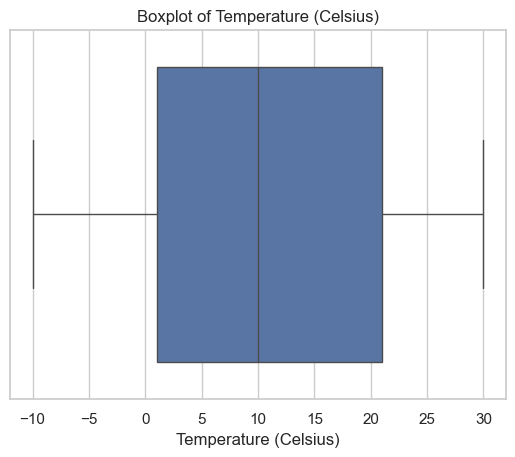

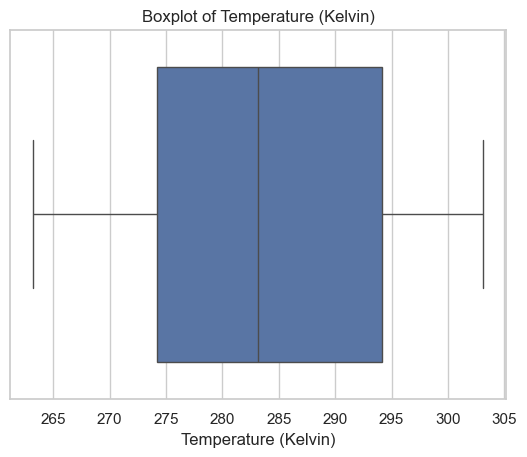

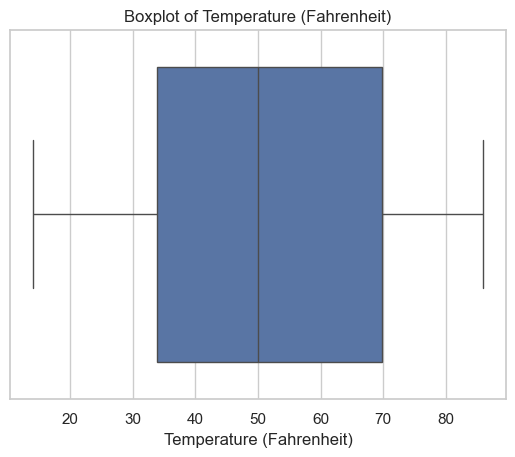

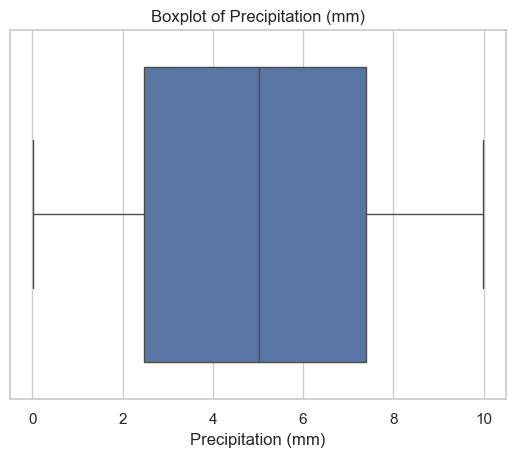

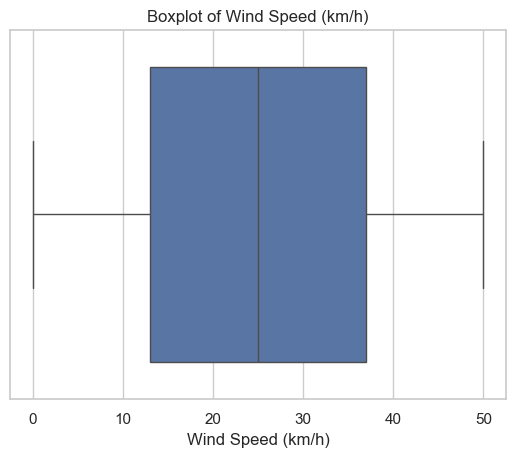

In [4]:
# Correlation matrix (numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for outlier detection
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 4 Test hypothesis and validation assumption

In [16]:
# Create contingency table
contingency = pd.crosstab(df['Windspeed(km/h)'], df['Precipitation(mm)'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

# Interpretation
if p < 0.05:
    print("✅ Significant association between Windspeed and Precipitation")
else:
    print("❌ No significant association between Windspeed and Precipitation")


KeyError: 'Windspeed(km/h)'

# 5 Detect data issues

In [7]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Percentage missing
print("\n% Missing values:\n", (df.isnull().mean()*100))

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Class imbalance check (if target column exists)
# Replace 'target' with your actual column
# print(df['target'].value_counts(normalize=True)*100)

Missing values per column:
 S.No.                       0
Date                        0
Temperature (Celsius)       0
Temperature (Kelvin)        0
Temperature (Fahrenheit)    0
Precipitation (mm)          0
Wind Speed (km/h)           0
dtype: int64

% Missing values:
 S.No.                       0.0
Date                        0.0
Temperature (Celsius)       0.0
Temperature (Kelvin)        0.0
Temperature (Fahrenheit)    0.0
Precipitation (mm)          0.0
Wind Speed (km/h)           0.0
dtype: float64

Duplicate rows: 0
